begin!
NAG end!
RMSProp end!
AdaDelta end!
Adam end!


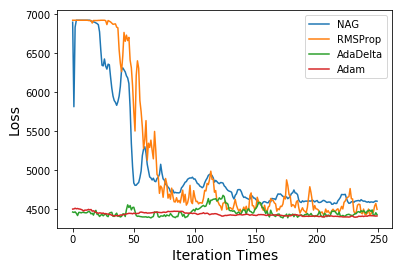

In [31]:
# %load sto-classification.py
#线性分类和随机梯度下降
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split #引入必要的库 

def get_data():  #获取数据，以及对数据进行一些预处理 
    data=load_svmlight_file('a9a.txt')
    x_train=data[0]
    y_train=data[1] #获取原始数据
    x_train=x_train.toarray()
    data=load_svmlight_file('a9a.t',123)
    x_validation=data[0]
    y_validation=data[1]
    x_validation=x_validation.toarray()
    m,n=np.shape(x_train)
    adder=np.ones(m)
    x_train=np.column_stack((x_train,adder))

    #adder=np.zeros(16281)
    #x_validation=np.column_stack((x_validation,adder))
    adder=np.ones(16281)
    x_validation=np.column_stack((x_validation,adder))

    theta=np.zeros(n+1) #参数初始化
    return x_train,y_train,x_validation,y_validation,theta

def use_NAG(iterations,rate,theta,x_train,y_train): #NAG算法的使用
    global loss_NAG
    k,j=np.shape(x_train)
    vt=0.0 #动量
    yita=0.8 #超参数,动量系数
    eps=0.0001 #收敛条件
    loss_old=0.0
    iteration_times=0 #迭代次数
    gradient=theta
    C=0.0
    C=0.9
    for i in range(0,iterations):
        gradient=0.0
        iteration_times=iteration_times+1
        samples=[random.randint(0,k-1) for ii in range(30)]
        for ii in samples: #每次就用一部分样本进行更新
            theta_temp=theta-yita*vt #计算带有过去动量信息的theta
            condition=1-y_train[ii]*(np.dot(theta_temp.T,x_train[ii])) #梯度情况的判定
            if condition>=0: 
                gradient=gradient-np.dot(y_train[ii],x_train[ii])*C 
            else:
                gradient=gradient
            
        vt=yita*vt+rate*gradient #计算现在的动量
        theta=theta-vt #更新我们的模型参数
        loss=get_loss(theta)
        loss_NAG.append(loss)
        #if abs(loss_old-loss)<eps:
       #     break
       # else:
        #    loss_old=loss
          
    iteration_time=[i for i in range(0,iteration_times)] #画图
    plt.plot(iteration_time,loss_NAG,label="NAG")



def use_RMSProp(iterations,rate,theta,x_train,y_train): #RMSProp算法
    global loss_RMSProp
    k,j=np.shape(x_train)
    yita=0.94 #超参，对之前的信息进行衰减
    eps=0.00001
    sigmond=0.00000001 #微小量，帮助稳定数值，避免分母为0
    theta_old=theta
    vt=0.0 #动量
    iteration_times=0
    gradient=theta
    C=0.0
    C=0.9
    rate=0.009
    for i in range(0,iterations):
        gradient=0.0
        iteration_times+=1
        samples=[random.randint(0,k-1) for ii in range(30)]
        for ii in samples:
            condition=1-y_train[ii]*(np.dot(theta.T,x_train[ii])) #梯度情况的判定
            if condition>=0: 
                gradient=gradient-np.dot(y_train[ii],x_train[ii])*C #求梯度
            else:
                gradient=gradient
                
        vt=yita*vt+(1-yita)*np.multiply(gradient,gradient)
        delta_theta=(rate/(np.power(sigmond+vt,0.5)))*gradient #求梯度变化
        theta-=delta_theta
        loss_RMSProp.append(get_loss(theta)) #求loss
        
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_RMSProp,label="RMSProp")


def use_AdaDelta(iterations,rate,theta,x_train,y_train): #AdaDelta算法
    global loss_AdaDelta
    k,j=np.shape(x_train)
    yita=0.97 #历史信息衰减
    eps=0.001
    sigmond=0.000001
    theta_old=theta
    Gt=0.0
    delta_t=0.0
    delta_theta=theta
    iteration_times=0
    gradient=theta
    C=0.0
    C=0.9
    for i in range(0,iterations):
        gradient=0.0
        iteration_times+=1
        samples=[random.randint(0,k-1)for ii in range(30)]
        for ii in samples:
            condition=1-y_train[ii]*(np.dot(theta.T,x_train[ii])) #梯度情况的判定
            if condition>=0: 
                gradient=gradient-np.dot(y_train[ii],x_train[ii])*C 
            else:
                gradient=gradient #求梯度
                
        Gt=yita*Gt+(1-yita)*np.multiply(gradient,gradient) #越新的历史越重要
        delta_theta=np.multiply((np.power(delta_t+sigmond,0.5)/np.power(Gt+sigmond,0.5)),gradient) 
            #估计学习率
        theta=theta-delta_theta #更新权重
        delta_t=yita*delta_t+(1-yita)*np.multiply(delta_theta,delta_theta) #更新历史信息
        loss_AdaDelta.append(get_loss(theta)) #计算loss
        
       
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_AdaDelta,label="AdaDelta")


def use_Adam(iterations,rate,theta,x_train,y_train):
    global loss_Adam
    k,j=np.shape(x_train)
    beta1=0.9 #超参数1，一阶矩估计系数
    beta2=0.999 #超参数2，二阶矩估计系数
    m=0.0
    v=0.0
    sigmond=0.000001
    eps=0.0000001 #收敛条件
    theta_old=theta
    t=0
    iteration_times=0
    gradient=theta
    C=0.0
    C=0.9
    rate=0.0015#custom the learning rate
    for i in range(0,iterations):
        gradient=0.0
        t=t+1
        iteration_times+=1
        samples=[random.randint(0,k-1) for ii in range(30)]
        for ii in samples:
            condition=1-y_train[ii]*(np.dot(theta.T,x_train[ii])) #梯度情况的判定
            if condition>=0: 
                gradient=gradient-np.dot(y_train[ii],x_train[ii])*C 
            else:
                gradient=gradient #求梯度
                
        m=beta1*m+(1-beta1)*gradient #梯度一阶矩估计
        v=beta2*v+(1-beta2)*np.multiply(gradient,gradient) #二阶矩估计
        alpha=rate*np.power(1-np.power(beta2,t),0.5)/(1-np.power(beta1,t)+sigmond) 
        theta=theta-alpha*m/(np.power(v,0.5)+sigmond)
        loss_Adam.append(get_loss(theta))
        
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_Adam,label="Adam")
        
def get_loss(theta): #使用Hinge Loss 来计算
    k,j=np.shape(x_validation)
    loss=0.0
    thershold=0.01 #阈值
    C=0.9 
    for i in range(k):
        hypothesis=np.dot(theta.T,x_validation[i]) #假设计算出来的结果
        if hypothesis>thershold: #大于为正例，反之为负例
            hypothesis=+1
        else:
            hypothesis=-1
        hinge=max(0,1-y_validation[i]*hypothesis) #计算单个样本的hingeloss
        loss=C*hinge+loss #总的数据集的loss
    return loss

rate=0.001 #学习率
iterations=250 #迭代次数
loss_NAG=[] #保存各种Loss
loss_RMSProp=[]
loss_AdaDelta=[]
loss_Adam=[]
x_train,y_train,x_validation,y_validation,theta=get_data() #获得数据
print("begin!")
use_NAG(iterations,rate,theta,x_train,y_train)
print("NAG end!")
use_RMSProp(iterations,rate,theta,x_train,y_train)
print("RMSProp end!")
use_AdaDelta(iterations,rate,theta,x_train,y_train)
print("AdaDelta end!")
use_Adam(iterations,rate,theta,x_train,y_train)#运用各种优化
print("Adam end!")
plt.xlabel("Iteration Times",size=14) #设置画布，将图显示出来
plt.ylabel("Loss",size=14)
plt.legend()
plt.show()

